Credits : https://www.youtube.com/watch?v=4jv1NGlAc_0&t=607s

# IMPORTS

In [60]:
import pandas_datareader as web
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = 20, 15
import numpy as np
import pandas as pd

# Data

In [3]:
ticker = 'GOOG'

df = web.get_data_yahoo(ticker, start='2000')
df = df.filter(['High', 'Low'])
df

,High,Low
Date,,
2004-08-19,51.835709,47.800831
2004-08-20,54.336334,50.062355
2004-08-23,56.528118,54.321388
2004-08-24,55.591629,51.591621
2004-08-25,53.798351,51.746044
...,...,...
2022-02-16,2758.919922,2696.472900
2022-02-17,2736.790039,2644.040039
2022-02-18,2676.479980,2606.141113


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4410 entries, 2004-08-19 to 2022-02-23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    4410 non-null   float64
 1   Low     4410 non-null   float64
dtypes: float64(2)
memory usage: 103.4 KB


In [14]:
print(f'p-values of High and Low are : \
{adfuller(df.High.diff().dropna())[1], adfuller(df.Low.diff().dropna())[1]} respectively. So one \
difference is \nstationary.')


p-values of High and Low are : (1.0395689600958593e-21, 1.1920121791517248e-23) respectively. So one difference is 
stationary.


# Train test split

In [15]:
forecast = 12
train, test = df[:-forecast], df[-forecast:]
train.shape, test.shape

((4398, 2), (12, 2))

In [16]:
model = VAR(train.diff().dropna())
sorted_order = model.select_order()
print(sorted_order.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        9.650       9.653   1.552e+04       9.651
1        9.423       9.432   1.237e+04       9.426
2        9.307       9.321   1.101e+04       9.312
3        9.275       9.296   1.067e+04       9.282
4        9.248       9.274   1.038e+04       9.257
5        9.232       9.265   1.022e+04       9.244
6        9.230       9.268   1.020e+04       9.243
7        9.222       9.265   1.011e+04       9.237
8        9.209       9.259       9989.       9.227
9        9.201      9.257*       9908.       9.221
10       9.201       9.263       9912.       9.223
11       9.198       9.265       9872.       9.221
12       9.198       9.271       9874.       9.223
13       9.194       9.273       9842.       9.222
14       9.191       9.276       9810.       9.221
15       9.189       9.280       9788.       9.221
16       9.188       9.284     

In [17]:
# Checking if Low is causing the high column
grangercausalitytests(df, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=233.9221, p=0.0000  , df_denom=4406, df_num=1
ssr based chi2 test:   chi2=234.0813, p=0.0000  , df=1
likelihood ratio test: chi2=228.0790, p=0.0000  , df=1
parameter F test:         F=233.9221, p=0.0000  , df_denom=4406, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=174.2731, p=0.0000  , df_denom=4403, df_num=2
ssr based chi2 test:   chi2=348.9419, p=0.0000  , df=2
likelihood ratio test: chi2=335.8188, p=0.0000  , df=2
parameter F test:         F=174.2731, p=0.0000  , df_denom=4403, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=143.8542, p=0.0000  , df_denom=4400, df_num=3
ssr based chi2 test:   chi2=432.2493, p=0.0000  , df=3
likelihood ratio test: chi2=412.3428, p=0.0000  , df=3
parameter F test:         F=143.8542, p=0.0000  , df_denom=4400, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=116.9274, p=0.

{1: ({'ssr_ftest': (233.92206157367747, 1.712986160074264e-51, 4406.0, 1),
   'ssr_chi2test': (234.0813366950395, 7.678994218277248e-53, 1),
   'lrtest': (228.07898371190822, 1.5641978613496026e-51, 1),
   'params_ftest': (233.92206157368642, 1.712986160066742e-51, 4406.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (174.27305893592128, 1.44740877102604e-73, 4403.0, 2),
   'ssr_chi2test': (348.9419231385606, 1.6913135884142918e-76, 2),
   'lrtest': (335.8187934546222, 1.1963976233305262e-73, 2),
   'params_ftest': (174.27305893592123, 1.44740877102604e-73, 4403.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (143.85424881136814, 6.358233224220326e-89, 4400.0, 3),
   'ssr_chi2test': (432.2493235307041, 2.2859171323909367e-93, 3),
   'lrtest': (412.34282531146164, 4.6936626446983334e-89, 3),
   'params_ftest': (143.85424881136584, 6.358233224238759e-89, 4400.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0.,

So Low is causing High column.

<AxesSubplot:xlabel='Date'>

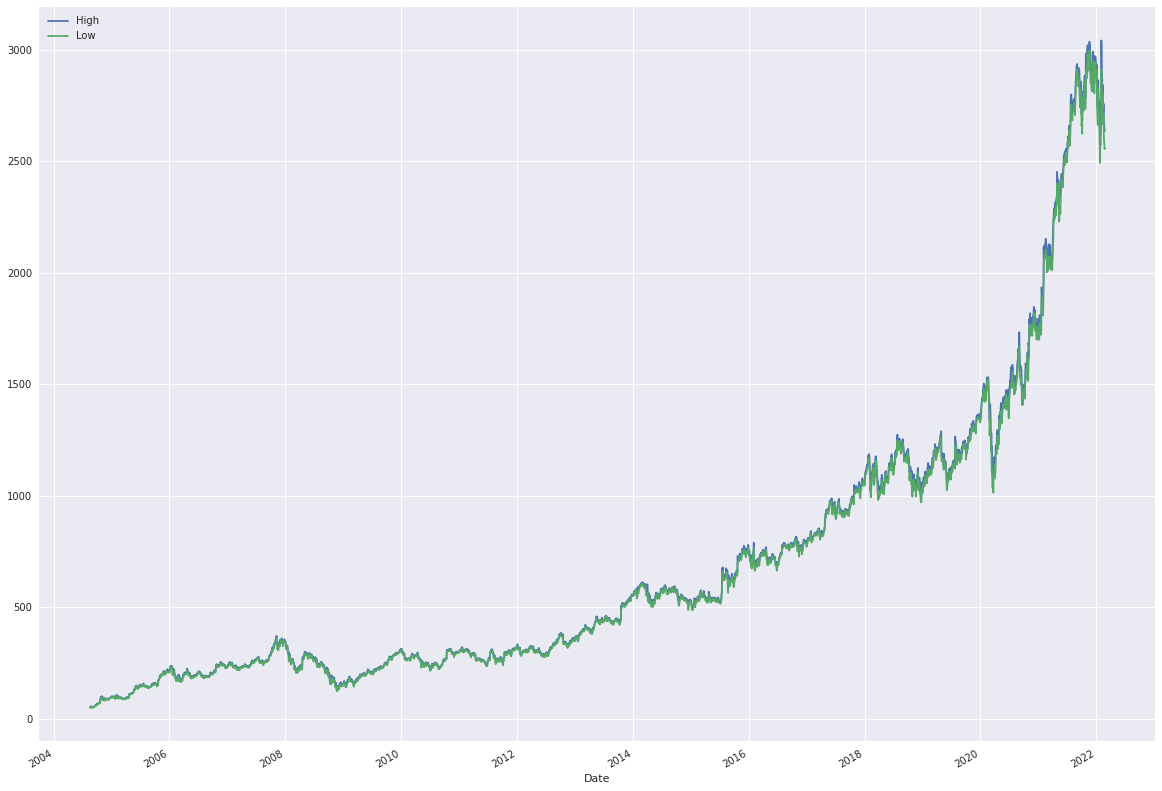

In [26]:
df.plot()

In [19]:
grangercausalitytests(df[['Low', 'High']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=61.1912 , p=0.0000  , df_denom=4406, df_num=1
ssr based chi2 test:   chi2=61.2328 , p=0.0000  , df=1
likelihood ratio test: chi2=60.8115 , p=0.0000  , df=1
parameter F test:         F=61.1912 , p=0.0000  , df_denom=4406, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=67.8389 , p=0.0000  , df_denom=4403, df_num=2
ssr based chi2 test:   chi2=135.8318, p=0.0000  , df=2
likelihood ratio test: chi2=133.7810, p=0.0000  , df=2
parameter F test:         F=67.8389 , p=0.0000  , df_denom=4403, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=45.4056 , p=0.0000  , df_denom=4400, df_num=3
ssr based chi2 test:   chi2=136.4336, p=0.0000  , df=3
likelihood ratio test: chi2=134.3643, p=0.0000  , df=3
parameter F test:         F=45.4056 , p=0.0000  , df_denom=4400, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=33.1161 , p=0.

{1: ({'ssr_ftest': (61.1911561353537, 6.436853995067552e-15, 4406.0, 1),
   'ssr_chi2test': (61.2328205630446, 5.070911082720062e-15, 1),
   'lrtest': (60.811511808213254, 6.280955638134728e-15, 1),
   'params_ftest': (61.19115613536034, 6.436853995046605e-15, 4406.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (67.83886797281284, 9.611101181472736e-30, 4403.0, 2),
   'ssr_chi2test': (135.83181014043106, 3.1951937243982906e-30, 2),
   'lrtest': (133.7810159490764, 8.908846887185214e-30, 2),
   'params_ftest': (67.83886797281352, 9.611101181463038e-30, 4403.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (45.40562492080682, 6.841763690028186e-29, 4400.0, 3),
   'ssr_chi2test': (136.43358342681523, 2.2201044321430717e-29, 3),
   'lrtest': (134.3643013747278, 6.200712111928886e-29, 3),
   'params_ftest': (45.40562492080853, 6.841763690010782e-29, 4400.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1.,

And High is causing low column - which was very clear from the graph. In general, A causes B does not mean B would cause A. 

In [45]:
train.diff()

,High,Low
Date,,
2004-08-19,NaN,NaN
2004-08-20,2.500626,2.261524
2004-08-23,2.191784,4.259033
2004-08-24,-0.936489,-2.729767
2004-08-25,-1.793278,0.154423
...,...,...
2022-01-31,49.460205,71.590088
2022-02-01,47.129883,45.885010
2022-02-02,278.000000,219.784912


In [47]:
# Now we shall fit the model using VARMAX. Reason I took order 4 is order 4 AIC score in 
#print(sorted_order.summary())
# seem pretty close to at order 31 - the smallest one. So we try. 
var = VARMAX(train, enforce_stationarity=True)
fitted = var.fit(disp=False)
print(fitted.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Statespace Model Results                           
Dep. Variable:        ['High', 'Low']   No. Observations:                 4398
Model:                         VAR(1)   Log Likelihood              -57876.853
                          + intercept   AIC                         115771.706
Date:                Wed, 23 Feb 2022   BIC                         115829.207
Time:                        21:07:12   HQIC                        115791.991
Sample:                             0                                         
                               - 4398                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):         4082.34, 56.86   Jarque-Bera (JB):    6511.29, 54042.54
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.65, 1.12   Skew:                      2.00, -0.70
Prob(H) (two-sided):            0.00,

In [63]:
predict = fitted.get_prediction(start=len(train), end=len(train)+len(test)-1)
predictions = predict.predicted_mean
predictions.index = test.index
predictions.columns = ['Pred High', 'Pred Low']
predictions = pd.concat([predictions, test], axis=1)
predictions

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,Pred High,Pred Low,High,Low
Date,,,,
2022-02-07,1391.105302,1488.963024,2876.929932,2773.979980
2022-02-08,2621.766503,2522.702487,2796.741943,2737.459961
2022-02-09,1176.222754,1269.562492,2843.510010,2807.540039
2022-02-10,2441.676077,2339.596010,2828.620117,2761.000000
2022-02-11,1033.856278,1124.062712,2785.665039,2665.770020
2022-02-14,2320.804063,2216.835812,2723.330078,2666.040039
2022-02-15,939.816817,1027.813268,2758.000000,2710.790039
2022-02-16,2239.402932,2134.297729,2758.919922,2696.472900
2022-02-17,877.982951,964.385253,2736.790039,2644.040039


<AxesSubplot:xlabel='Date'>

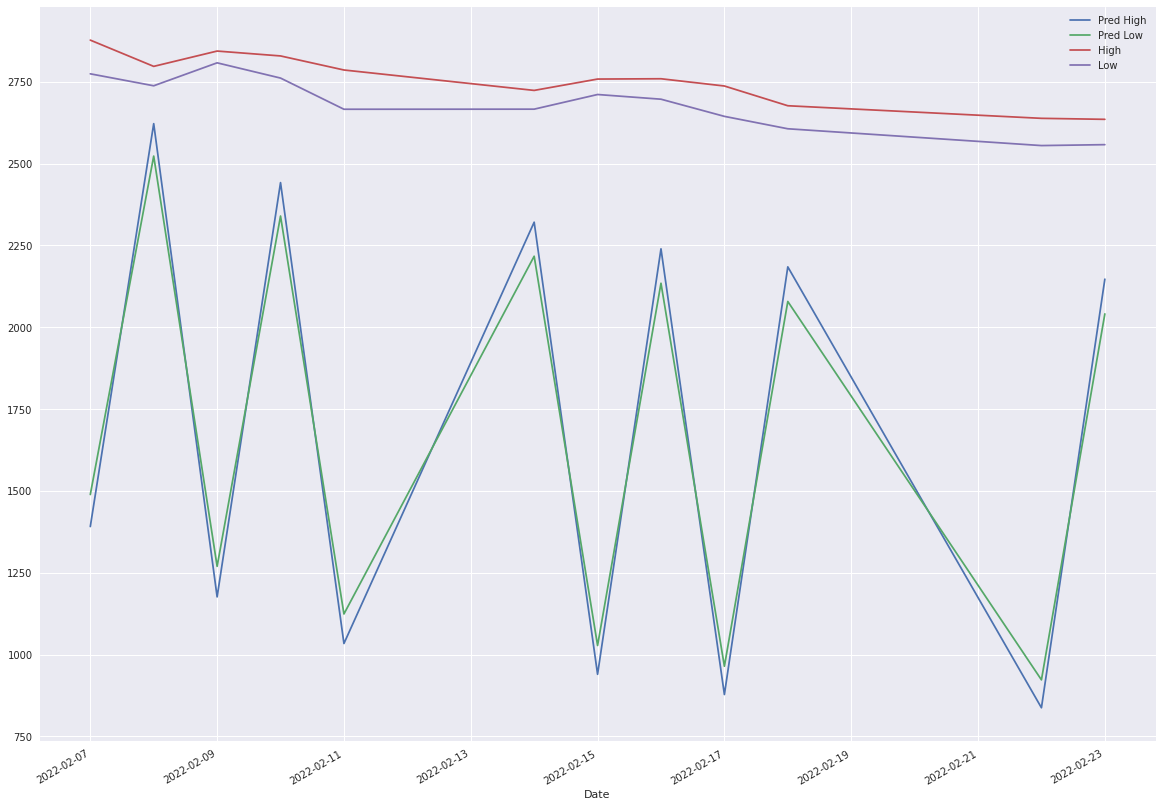

In [64]:
predictions.plot()

In [78]:
#prediction in future 10 days
dates = pd.date_range(start=df.index[-1], periods=11)[1:]

future = 10
forecast = fitted.get_prediction(start=len(df), end=len(df)+future-1)
forecast = forecast.predicted_mean
forecast.set_index(dates, inplace=True)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


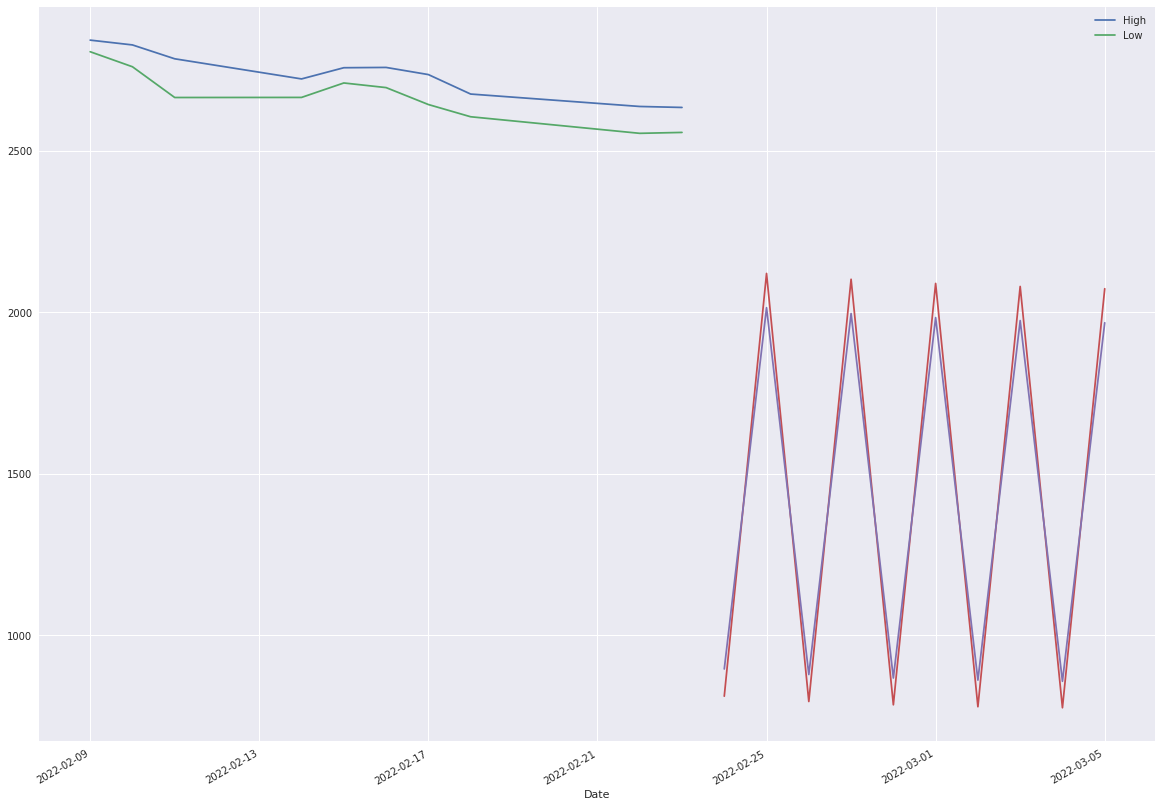

In [82]:
df[-10:].plot()
plt.plot(forecast)

That seems like terrible forecast. But we shall improve the model and see if it can help us, which is for the next time. Thanks.